<a href="https://colab.research.google.com/github/HareeshVutla/Deeplearning/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models


In [3]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'cifar10',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompletePHY5CX/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompletePHY5CX/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [4]:
print("training_images_size :",img_train.shape)
print("training_labels_size :",label_train.shape)
print("testing_images_size  :",img_test.shape)
print("testing_labels_size  :",label_test.shape)

training_images_size : (50000, 32, 32, 3)
training_labels_size : (50000,)
testing_images_size  : (10000, 32, 32, 3)
testing_labels_size  : (10000,)


In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [6]:
def plot_sample (img_train, label_train, index):
  plt.imshow(img_train[index])
  plt.xlabel(classes[label_train[index]])

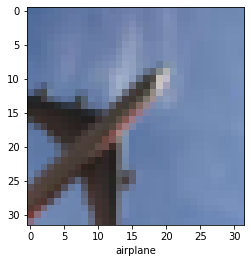

In [7]:
plot_sample(img_train, label_train, 20)

In [8]:
img_train = img_train/255
img_test = img_test/255


# **Simple ANN**

In [19]:
ANN = models.Sequential([layers.Flatten(input_shape= (32,32,3)),
                         layers.Dense(3000, activation = 'relu'),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(10,activation = 'sigmoid')])

ANN.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ANN.fit(img_train, label_train, epochs = 4)

Epoch 1/4
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8067 - accuracy: 0.3560
Epoch 2/4
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6210 - accuracy: 0.4295
Epoch 3/4
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5397 - accuracy: 0.4565
Epoch 4/4
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4815 - accuracy: 0.4792


In [20]:
ANN.evaluate (img_test, label_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.5008 - accuracy: 0.4656


[1.5008249282836914, 0.46560001373291016]

In [23]:
CNN = models.Sequential([
                         # CNN
                         layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3) ),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu' ),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu' ),
                         layers.MaxPooling2D((2,2)),

                         # Dense
                         
                         layers.Flatten(),
                         layers.Dense(64, activation = 'relu'),
                         layers.Dense(10,activation = 'softmax')])


In [24]:
CNN.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
CNN.fit(img_train, label_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5209 - accuracy: 0.4421
Epoch 2/10
 385/1563 [======>.......................] - ETA: 56s - loss: 1.2128 - accuracy: 0.5648

In [ ]:
CNN.evaluate(img_test, label_test)